<a href="https://colab.research.google.com/github/sheha919/Cobaltocenium_project/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_excel('cobaltocenium_data.xlsx')
df.head()

,Unnamed: 0,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   903 non-null    int64  
 1   Name                         903 non-null    object 
 2   Co[CpY][CpY']OH energy (Eh)  903 non-null    float64
 3   CoCpY' name                  903 non-null    object 
 4   CoCpY'energy (Eh)            903 non-null    float64
 5   CpY name                     903 non-null    object 
 6   CpY energy (Eh)              903 non-null    float64
 7   BDE (kcal/mol)               903 non-null    float64
 8   Dipole moment(Debye)         903 non-null    float64
 9   EHOMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 10  ELUMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 11  EHOMO(CoCpY'OH) (Eh)         903 non-null    float64
 12  ELUMO(CoCpY'OH) (Eh)         903 non-null    float64
 13  EHOMO(CpY) (Eh)     

In [4]:
ml_df=df.copy()

In [5]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


# Filter Data

In [6]:
#BDE data greater than 3kcal/mol
drop_bde = (ml_df[ml_df['BDE (kcal/mol)']<=3])
len(drop_bde)

30

In [7]:
drop_bde['Name']

290            Co(Cp-C₂H)(Cp-CBr₃)OH
450             Co(Cp-Cl)(Cp-CBr₃)OH
479             Co(Cp-Br)(Cp-CBr₃)OH
507              Co(Cp-F)(Cp-CBr₃)OH
534      Co(Cp-(CO)NHCH₃)(Cp-CBr₃)OH
585       Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632          Co(Cp-(CO)H)(Cp-CBr₃)OH
651        Co(Cp-(CO)F)(Cp-(CO)Cl)OH
654          Co(Cp-(CO)F)(Cp-CBr₃)OH
657           Co(Cp-(CO)F)(Cp-NO₂)OH
658        Co(Cp-(CO)F)(Cp-SOOCF₃)OH
672       Co(Cp-(CO)Cl)(Cp-(CO)Cl)OH
675         Co(Cp-(CO)Cl)(Cp-CBr₃)OH
676           Co(Cp-(CO)Cl)(Cp-CN)OH
678          Co(Cp-(CO)Cl)(Cp-NO₂)OH
679       Co(Cp-(CO)Cl)(Cp-SOOCF₃)OH
695            Co(Cp-CF₃)(Cp-CBr₃)OH
714           Co(Cp-CCl₃)(Cp-CBr₃)OH
732           Co(Cp-CBr₃)(Cp-CBr₃)OH
733             Co(Cp-CBr₃)(Cp-CN)OH
734         Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735            Co(Cp-CBr₃)(Cp-NO₂)OH
736         Co(Cp-CBr₃)(Cp-SOOCF₃)OH
740        Co(Cp-CBr₃)(Cp-o-PhCF₃)OH
745    Co(Cp-CBr₃)(Cp-op-Ph(CH₃)₃)OH
752              Co(Cp-CN)(Cp-NO₂)OH
753           Co(Cp-CN)(Cp-SOOCF₃)OH
7

In [8]:
ml_df = ml_df[ml_df['BDE (kcal/mol)']>3]
len(ml_df)

873

In [9]:
conh2_df = ml_df[(ml_df["CoCpY' name"]=='(CO)NH₂')|(ml_df["CpY name"]=='(CO)NH₂')]
len(conh2_df)

42

In [10]:
conh2_df.loc[:,"EHOMO(CoCpY'OH) (Eh)"]

16    -0.2209
57    -0.2209
97    -0.2209
136   -0.2209
174   -0.2209
211   -0.2209
247   -0.2209
282   -0.2209
316   -0.2053
349   -0.2040
381   -0.2209
412   -0.2131
442   -0.2209
471   -0.2209
499   -0.2209
526   -0.2209
552   -0.2209
553   -0.2209
554   -0.2209
555   -0.2209
556   -0.2209
557   -0.2209
558   -0.2245
559   -0.2209
560   -0.2209
561   -0.2209
562   -0.2209
563   -0.2209
564   -0.2209
565   -0.2209
566   -0.2209
567   -0.2209
568   -0.2209
569   -0.2209
570   -0.2209
571   -0.2209
572   -0.2209
573   -0.2209
574   -0.2209
575   -0.2209
576   -0.2209
577   -0.2209
Name: EHOMO(CoCpY'OH) (Eh), dtype: float64

In [11]:
ml_df = ml_df[~((ml_df["CoCpY' name"]=='(CO)NH₂')|(ml_df["CpY name"]=='(CO)NH₂'))]

In [12]:
ml_df[(ml_df["CpY name"]=='(CO)NH₂')]

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)


In [13]:
ml_df[(ml_df["CoCpY' name"]=='(CO)NH₂')]

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)


In [14]:
ml_df.shape

(831, 21)

In [15]:
frag = ml_df[["Name", "CoCpY' name", "CpY name", 
              "BDE (kcal/mol)",
              "EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge",
              "CoCpY' polarizability", "CpY polarizability"]]
frag.head()

,Name,CoCpY' name,CpY name,BDE (kcal/mol),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,N(CH₃)₂,N(CH₃)₂,17.233174,-0.1787,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,OCH₃,N(CH₃)₂,17.545539,-0.1935,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,O(CO)CH₃,N(CH₃)₂,17.961810,-0.2170,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,P(CH₃)₂,N(CH₃)₂,16.445457,-0.2133,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,S(CH₃),N(CH₃)₂,14.308038,-0.2015,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932


C:\Users\sheha\AppData\Local\Temp\ipykernel_19056\1743145682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abs(frag.corr())


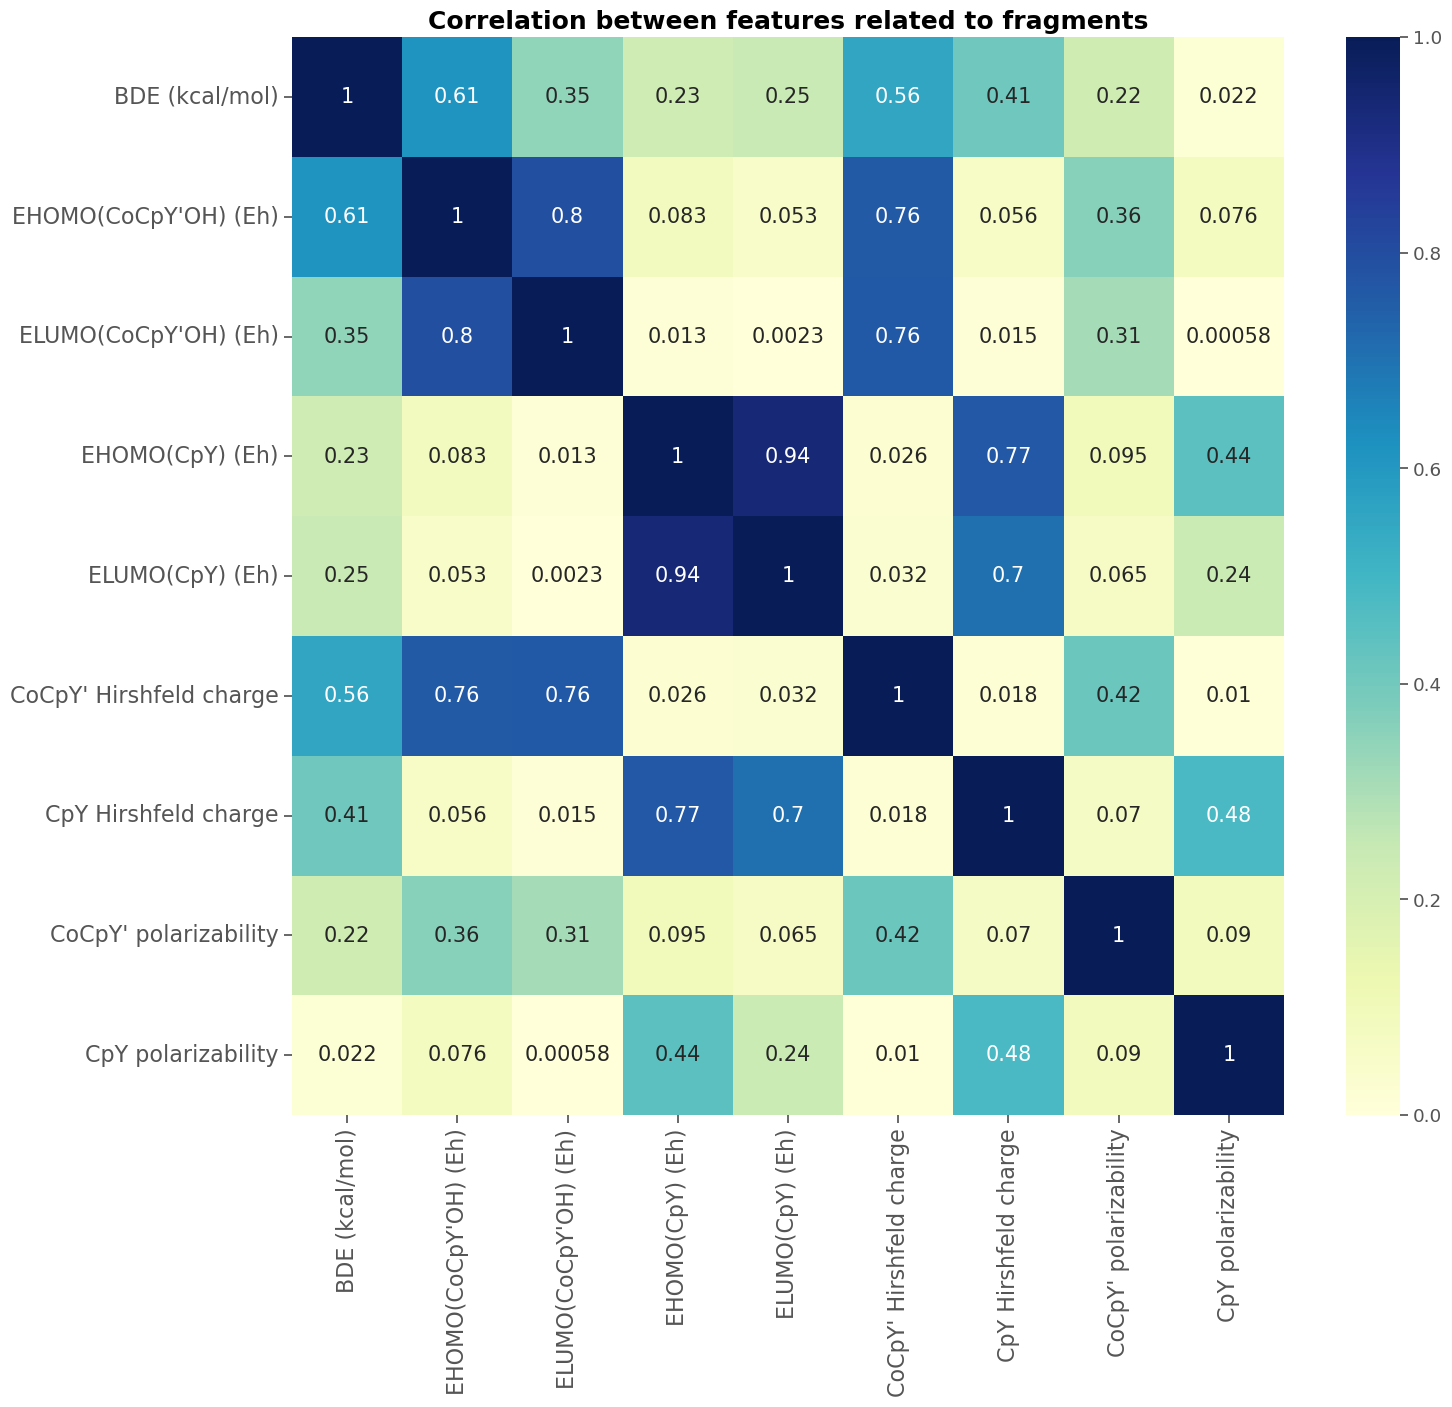

In [16]:
corr = abs(frag.corr())
plt.figure(figsize=[16,14])
sns.heatmap(corr, cmap="YlGnBu",  vmin=0.0, vmax=1.0,annot = True, annot_kws={'size': 15})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Correlation between features related to fragments', fontsize = 18, fontweight = 'bold');

# Statistics

In [17]:
ml_df.describe()

,Co[CpY][CpY']OH energy (Eh),CoCpY'energy (Eh),CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,-2898.945996,-2091.744426,-807.178428,14.522094,16.363508,-0.190016,-0.086012,-0.214629,-0.085436,-0.200476,-0.117530,0.034829,0.019384,33.462700,49.085628,-32.631321,3.300887,4.009665
std,1349.262171,795.366699,1101.742165,5.634178,3.118003,0.002590,0.011536,0.013451,0.009091,0.021752,0.016491,0.063649,0.050514,30.351102,33.706098,3.553558,0.010215,0.161122
min,-10408.735637,-9411.126546,-7952.631083,3.185810,4.493000,-0.198100,-0.118800,-0.237800,-0.106800,-0.246900,-0.151300,-0.081960,-0.081960,0.265420,0.265420,-41.666000,3.282637,3.691918
25%,-2885.228557,-2220.117477,-768.161154,10.468894,14.217150,-0.191300,-0.093200,-0.224600,-0.092000,-0.216600,-0.125000,-0.024960,-0.015190,12.952910,22.669890,-35.140000,3.292939,3.893793
50%,-2572.857190,-1879.898322,-542.529457,14.086038,16.566100,-0.189900,-0.084800,-0.213300,-0.084700,-0.201000,-0.118300,0.031767,0.011965,24.041310,52.745580,-32.975125,3.298575,3.996025
75%,-2298.809144,-1765.336758,-401.524834,17.724736,18.270300,-0.188300,-0.078200,-0.204500,-0.079400,-0.188600,-0.111800,0.081263,0.057107,43.981350,60.200450,-30.339625,3.306256,4.107002
max,-1845.520993,-1652.003971,-193.474683,35.149329,27.728700,-0.180300,-0.054800,-0.171600,-0.063300,-0.155200,-0.076800,0.160449,0.160449,150.643000,150.643000,-22.935125,3.337480,4.725310


In [18]:
#checking for duplicates
ml_df.duplicated().sum()

0

In [19]:
#checking for missing values
ml_df.isna().sum().sum()

0

In [20]:
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [21]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 902
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         831 non-null    object 
 1   Co[CpY][CpY']OH energy (Eh)  831 non-null    float64
 2   CoCpY' name                  831 non-null    object 
 3   CoCpY'energy (Eh)            831 non-null    float64
 4   CpY name                     831 non-null    object 
 5   CpY energy (Eh)              831 non-null    float64
 6   BDE (kcal/mol)               831 non-null    float64
 7   Dipole moment(Debye)         831 non-null    float64
 8   EHOMO(Co[CpY][CpY']OH) (Eh)  831 non-null    float64
 9   ELUMO(Co[CpY][CpY']OH) (Eh)  831 non-null    float64
 10  EHOMO(CoCpY'OH) (Eh)         831 non-null    float64
 11  ELUMO(CoCpY'OH) (Eh)         831 non-null    float64
 12  EHOMO(CpY) (Eh)              831 non-null    float64
 13  ELUMO(CpY) (Eh)     

#Validate Split

In [22]:
y = ml_df['BDE (kcal/mol)']
X = ml_df[["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [23]:
X_train

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
494,-0.2151,-0.0841,-0.1552,-0.0768,0.083209,-0.081960
357,-0.2040,-0.0770,-0.2267,-0.1357,-0.029920,0.062475
478,-0.2246,-0.0894,-0.2190,-0.1256,0.057107,0.083209
730,-0.2246,-0.0894,-0.1952,-0.1163,0.057107,-0.040350
311,-0.2131,-0.0789,-0.2070,-0.1100,-0.050620,-0.024960
...,...,...,...,...,...,...
73,-0.2042,-0.0759,-0.1886,-0.1003,0.002747,-0.015190
109,-0.2378,-0.0984,-0.2092,-0.1170,0.132226,0.071736
277,-0.2131,-0.0789,-0.2166,-0.1286,-0.050620,0.072356
449,-0.2136,-0.0847,-0.2281,-0.1354,0.084139,0.057107


# Functions

## Evaluvation

In [24]:
#function for evaluation
def eval_model(pipe, X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  eval_results = pd.DataFrame(columns = ['Metrics','Train Score', 'Test Score'])
  train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
  test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  eval_results.loc[1, 'Metrics'] = 'MAE'
  eval_results.loc[2, 'Metrics'] = 'MSE'
  eval_results.loc[3, 'Metrics'] = 'RMSE'
  eval_results.loc[4, 'Metrics'] = 'R2'

  eval_results.loc[1, 'Train Score'] = train_mae
  eval_results.loc[2, 'Train Score'] = train_mse
  eval_results.loc[3, 'Train Score'] = train_rmse
  eval_results.loc[4, 'Train Score'] = train_r2

  eval_results.loc[1, 'Test Score'] = test_mae
  eval_results.loc[2, 'Test Score'] = test_mse
  eval_results.loc[3, 'Test Score'] = test_rmse
  eval_results.loc[4, 'Test Score'] = test_r2

  return eval_results

In [25]:
#function for final evaluation
def eval_model_final(pipe, 
                     X_train=X_train, y_train=y_train, 
                     X_test=X_test , y_test= y_test):

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  return (round(train_r2,6), round(test_r2,6), round(train_rmse,6), round(test_rmse,6))

## Plot

In [26]:
def train_test_plot(model_name, pipe,  X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,4))
#subplot1
  ax = sns.regplot(x = y_train, 
                   y = pipe.predict(X_train), 
                   line_kws = {'color':'black', 'ls': ':', 'label' :f'R$^2$ = {round(r2_score(y_train, pipe.predict(X_train)), 6)}'}, 
                   ax=axes[0],
                   )
  axes[0].set_title('Train Data', fontweight = 'bold')
  axes[0].set_xlabel('Actual BDE (kcal/mol)')
  axes[0].set_ylabel('Predicted BDE (kcal/mol)');

#subplot2
  ax = sns.regplot(x = y_test, 
                   y = pipe.predict(X_test), 
                   line_kws = {'color':'black', 'ls': ':', 
                   'label' : f'R$^2$ = {round(r2_score(y_test, pipe.predict(X_test)), 6)}'}, 
                   ax=axes[1])
  axes[1].set_title('Test Data', fontweight = 'bold')
  axes[1].set_xlabel('Actual BDE (kcal/mol)')
  axes[1].set_ylabel('Predicted BDE (kcal/mol)')
  
  fig.suptitle(f'{model_name}', fontsize = 20, fontweight = 'bold', y = 1.1)
  plt.savefig(f'{model_name}_no_conh2.png')
  [ax.legend() for ax in axes];
  return (fig, axes)

# Data Preprocessing

## Instantiate colimn transformers

In [27]:
scaler = StandardScaler()

# Linear Regression Model

In [28]:
lr = LinearRegression()
lr_pipe = make_pipeline(scaler, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
#evaluvation of linear rigression
eval_model(lr_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.298483,2.196742
2,MSE,9.511455,8.794275
3,RMSE,3.084065,2.965514
4,R2,0.710459,0.675524


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

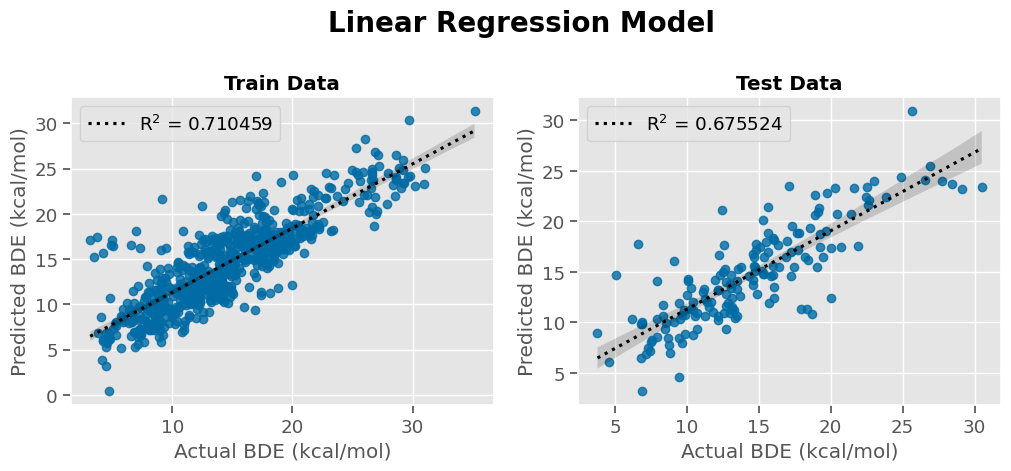

In [30]:
train_test_plot('Linear Regression Model', lr_pipe)

# Decision Tree Model

In [31]:
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(scaler, dt)
dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [32]:
#evaluvation of initial decision tree
eval_model(dt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.0,1.495297
2,MSE,0.0,4.881999
3,RMSE,0.0,2.209525
4,R2,1.0,0.819872


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

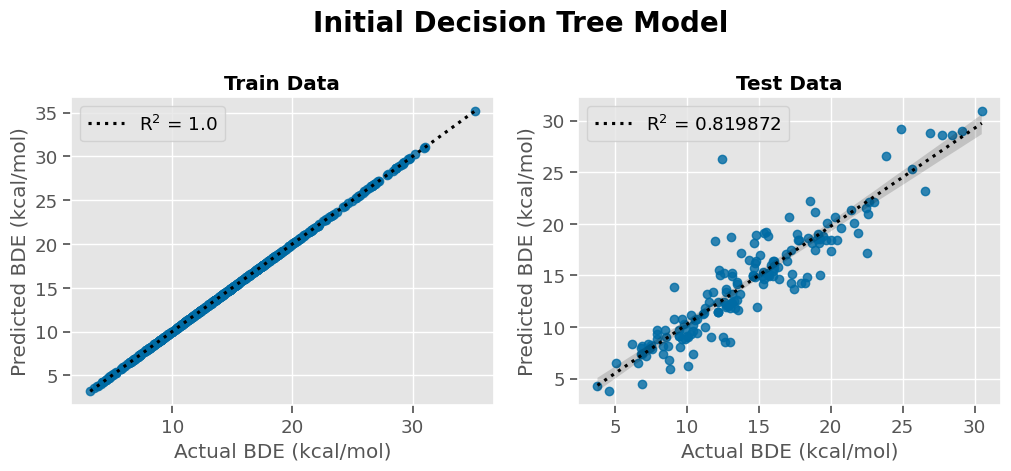

In [33]:
train_test_plot('Initial Decision Tree Model', dt_pipe)

# Bagged Tree Model

In [34]:
bt = BaggingRegressor(random_state = 42)
bt_pipe = make_pipeline(scaler, bt)
bt_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [35]:
#evaluvation of initial bagged tree
eval_model(bt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.430133,1.015606
2,MSE,0.388585,1.807422
3,RMSE,0.623366,1.344404
4,R2,0.988171,0.933313


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

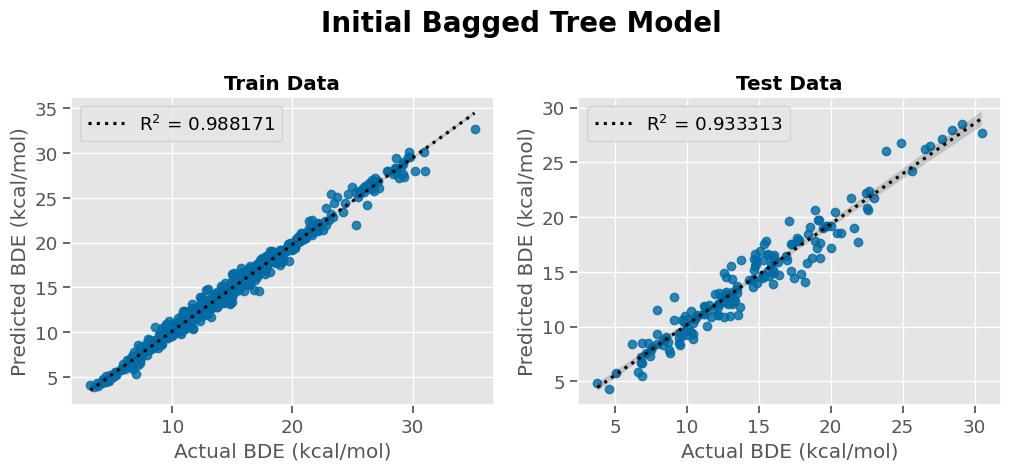

In [36]:
train_test_plot('Initial Bagged Tree Model', bt_pipe)

# K-Nearest Neighbors Model

In [37]:
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [38]:
#evaluvation of initial knn
eval_model(knn_pipe)

,Metrics,Train Score,Test Score
1,MAE,1.477621,1.835935
2,MSE,4.337356,6.787486
3,RMSE,2.082632,2.60528
4,R2,0.867965,0.749567


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

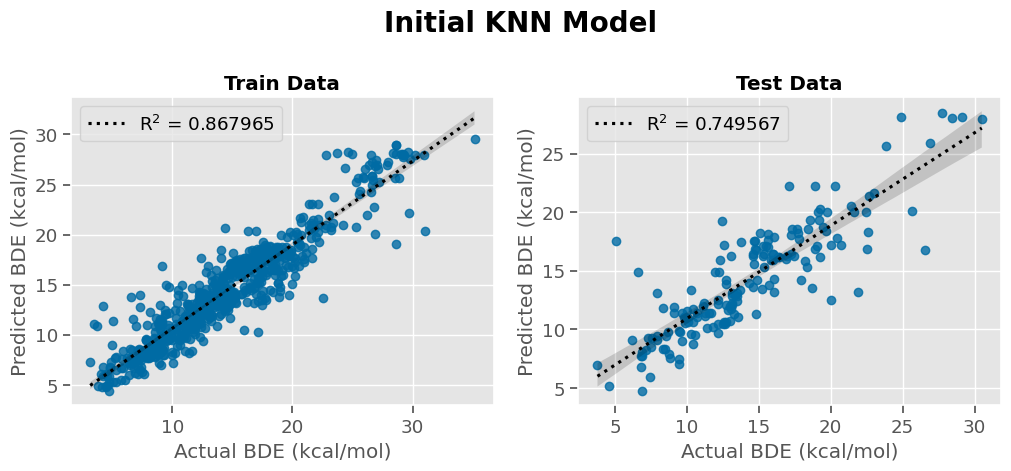

In [39]:
train_test_plot('Initial KNN Model', knn_pipe)

# Random Forest Model

In [40]:
rf = RandomForestRegressor(random_state= 42)
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [41]:
#evaluvation of initial bagged tree
eval_model(rf_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.395384,0.96782
2,MSE,0.301897,1.601268
3,RMSE,0.549451,1.265412
4,R2,0.99081,0.940919


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

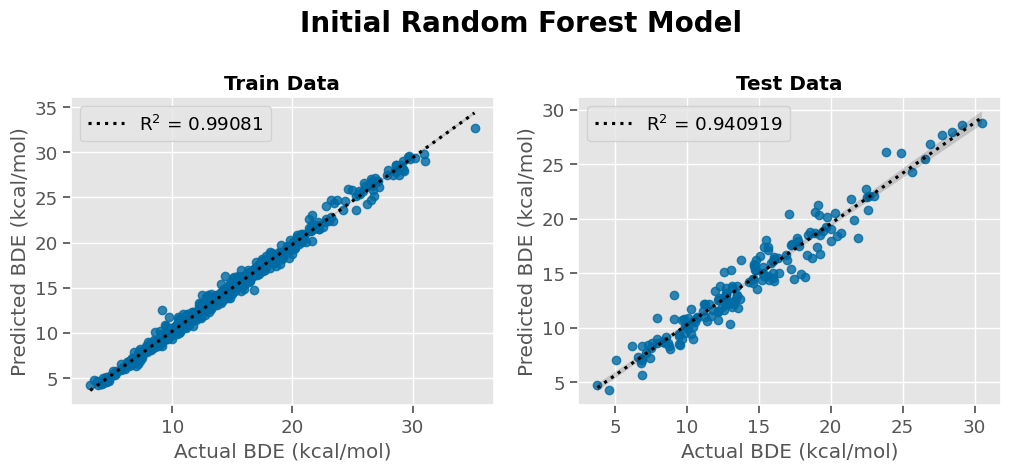

In [42]:
train_test_plot('Initial Random Forest Model', rf_pipe)

# Support Vector Regression Model

In [43]:
svg = SVR()
svg_pipe = make_pipeline(scaler, svg)
svg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [44]:
#evaluvation of initial svg
eval_model(svg_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.103447,2.112735
2,MSE,9.282944,8.631601
3,RMSE,3.046792,2.937959
4,R2,0.717415,0.681526


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

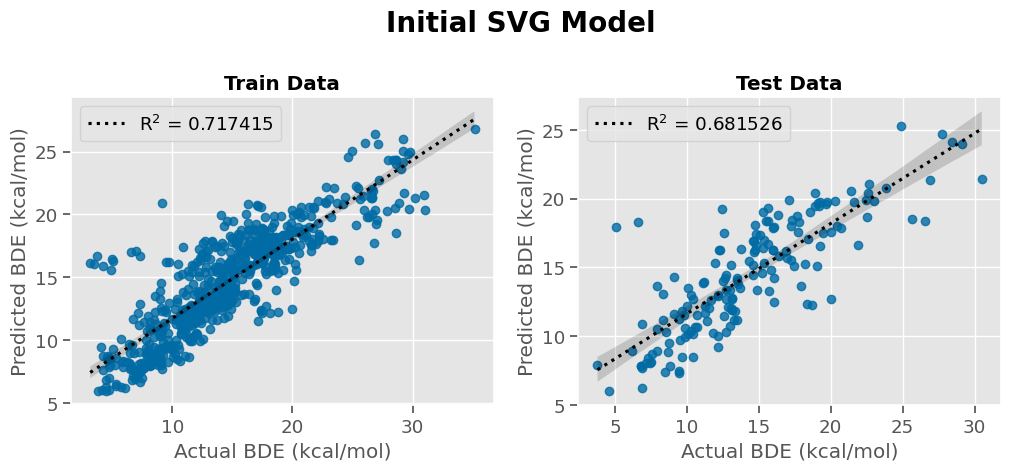

In [45]:
train_test_plot('Initial SVG Model', svg_pipe)

# XG Boost

In [46]:
xgb = XGBRegressor(random_state= 42)
xgb_pipe = make_pipeline(scaler, xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [47]:
#evaluvation of initial xgb
eval_model(xgb_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.084071,0.838097
2,MSE,0.013892,1.329988
3,RMSE,0.117865,1.153251
4,R2,0.999577,0.950928


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

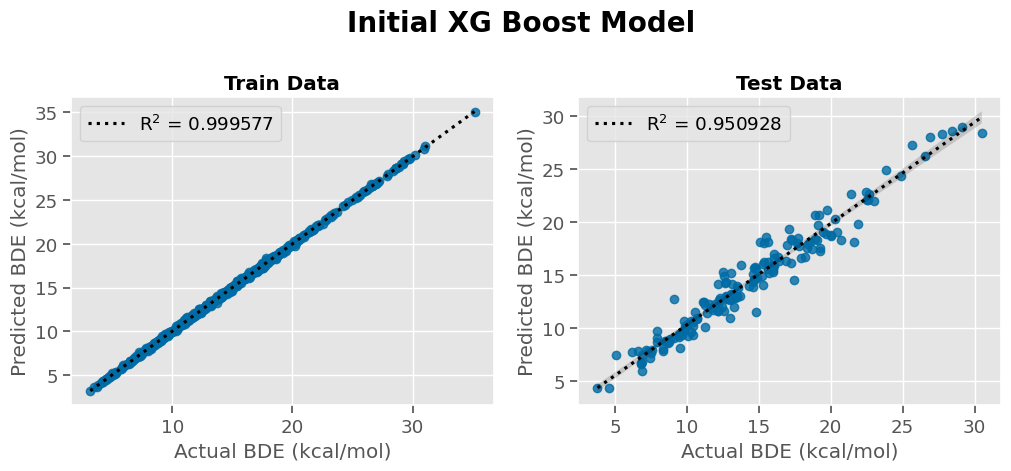

In [48]:
train_test_plot('Initial XG Boost Model', xgb_pipe)

# Evaluvation of initial models

In [49]:
model = ['Linear Regression', 'Decision Tree', 'Bagged Tree', 'KNN', 'Random Forest', 'SVG', 'XG Boost']
pipe = [lr_pipe, dt_pipe, bt_pipe, knn_pipe, rf_pipe, svg_pipe, xgb_pipe]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [50]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
Linear Regression,0.710459,0.675524,3.084065,2.965514
Decision Tree,1.0,0.819872,0.0,2.209525
Bagged Tree,0.988171,0.933313,0.623366,1.344404
KNN,0.867965,0.749567,2.082632,2.60528
Random Forest,0.99081,0.940919,0.549451,1.265412
SVG,0.717415,0.681526,3.046792,2.937959
XG Boost,0.999577,0.950928,0.117865,1.153251


- According to the train and test RMSE values for the models;
  - all models have overfilling issue and decision tree has the highest overfittin problem.
- Out of these 7 models, XG boost, random forest and bagged tree are selected based on the test R$^2$ score to do further optimizations.


# Tunning Hyperparametrs and cross validation of models

## For XG Boost

In [51]:
#parametrs of XG boost model
xgb_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('xgbregressor',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=1, predictor='auto', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'xgbregressor': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1,

In [52]:
xgb_param_grid = {'xgbregressor__max_depth': range(1,10,1),
                 'xgbregressor__learning_rate':[0.2],
                 'xgbregressor__n_estimators': [125],}

In [53]:
xgb_pipe_gs = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5)
xgb_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     enable_categorical=False,
                                                     gamma=0, gpu_id=-1,
                                                     importance_type=None,
                                                     interaction_constraints='',
                                                     learning_rate=0.300000012,
                                                     max_delta_step=0,
                                                     max_depth=6,
                                                     min_c...
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=100,
                                                     n_jobs=12,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=42,
                                                     reg_alpha=0, reg_lambda=1,
                                                     scale_pos_weight=1,
                                                     subsample=1,
                                                     tree_method='exact',
                                                     validate_parameters=1,
                                                     verbosity=None))]),
             param_grid={'xgbregressor__learning_rate': [0.2],
                         'xgbregressor__max_depth': range(1, 10),
                         'xgbregressor__n_estimators': [125]})

In [54]:
print(f'Best parameters: {xgb_pipe_gs.best_params_}')

Best parameters: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 125}


In [55]:
xgb_opt = xgb_pipe_gs.best_estimator_
xgb_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.2,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=125, n_jobs=12, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [56]:
eval_model(xgb_opt)

,Metrics,Train Score,Test Score
1,MAE,0.345639,0.755859
2,MSE,0.236216,1.020966
3,RMSE,0.486021,1.010429
4,R2,0.992809,0.96233


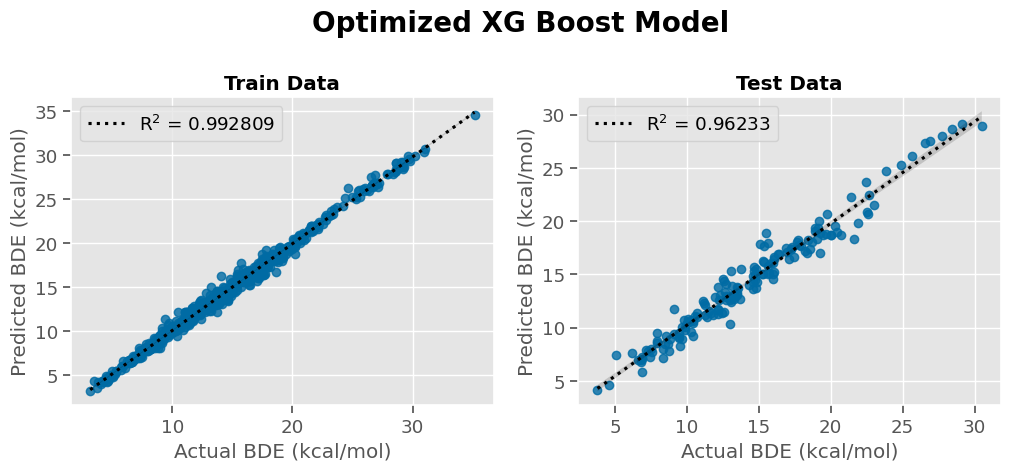

In [57]:
train_test_plot('Optimized XG Boost Model', xgb_opt)
plt.savefig('xgb_opt_refined.png')

## For Random Forest

In [58]:
#parametrs of random forest model
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_

In [59]:
#maximum max_depth value of estimators of rf 
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

24

In [217]:
rf_param_grid = {'randomforestregressor__n_estimators':[99],
                'randomforestregressor__max_depth':[20]}


In [218]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid, cv =5)
rf_pipe_gs.fit(X_train, y_train);


In [219]:
print(f'Best parameters: {rf_pipe_gs.best_params_}')

Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__n_estimators': 99}


In [220]:
rf_opt = rf_pipe_gs.best_estimator_
rf_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, n_estimators=99,
                                       random_state=42))])

In [221]:
eval_model(rf_opt)

,Metrics,Train Score,Test Score
1,MAE,0.396101,0.967185
2,MSE,0.301921,1.597528
3,RMSE,0.549473,1.263934
4,R2,0.990809,0.941057


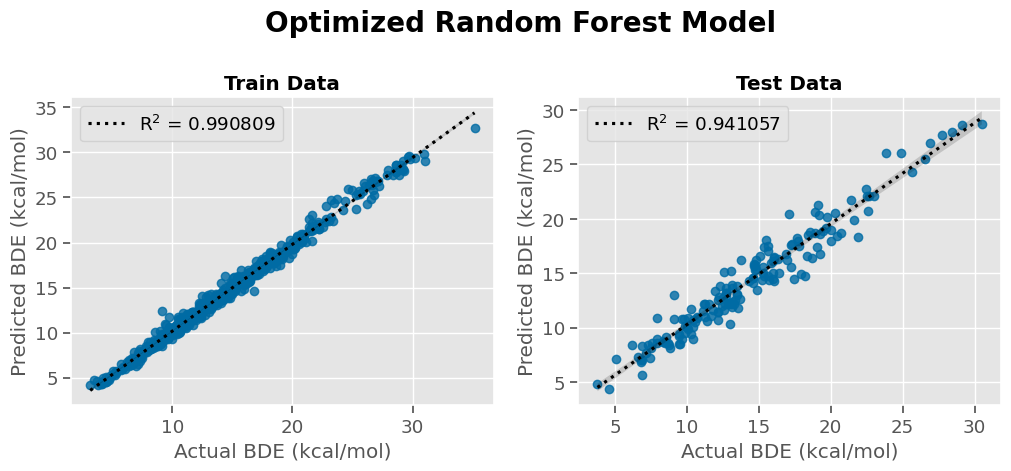

In [222]:
train_test_plot('Optimized Random Forest Model', rf_opt)
plt.savefig('rf_opt_refined.png')

## For Bagged Tree

In [223]:
#parametrs of decision tree model
bt_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('baggingregressor', BaggingRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'baggingregressor': BaggingRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'baggingregressor__base_estimator': None,
 'baggingregressor__bootstrap': True,
 'baggingregressor__bootstrap_features': False,
 'baggingregressor__max_features': 1.0,
 'baggingregressor__max_samples': 1.0,
 'baggingregressor__n_estimators': 10,
 'baggingregressor__n_jobs': None,
 'baggingregressor__oob_score': False,
 'baggingregressor__random_state': 42,
 'baggingregressor__verbose': 0,
 'baggingregressor__warm_start': False}

In [259]:
bt_param_grid = {'baggingregressor__n_estimators':[99]}

In [260]:
bt_pipe_gs = GridSearchCV(bt_pipe, bt_param_grid, cv=5)
bt_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('baggingregressor',
                                        BaggingRegressor(random_state=42))]),
             param_grid={'baggingregressor__n_estimators': [99]})

In [261]:
print(f'Best parameters: {bt_pipe_gs.best_params_}')

Best parameters: {'baggingregressor__n_estimators': 99}


In [262]:
bt_opt = bt_pipe_gs.best_estimator_
bt_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=99, random_state=42))])

In [263]:
eval_model(bt_opt)

,Metrics,Train Score,Test Score
1,MAE,0.395658,0.973258
2,MSE,0.302865,1.608966
3,RMSE,0.550332,1.26845
4,R2,0.99078,0.940635


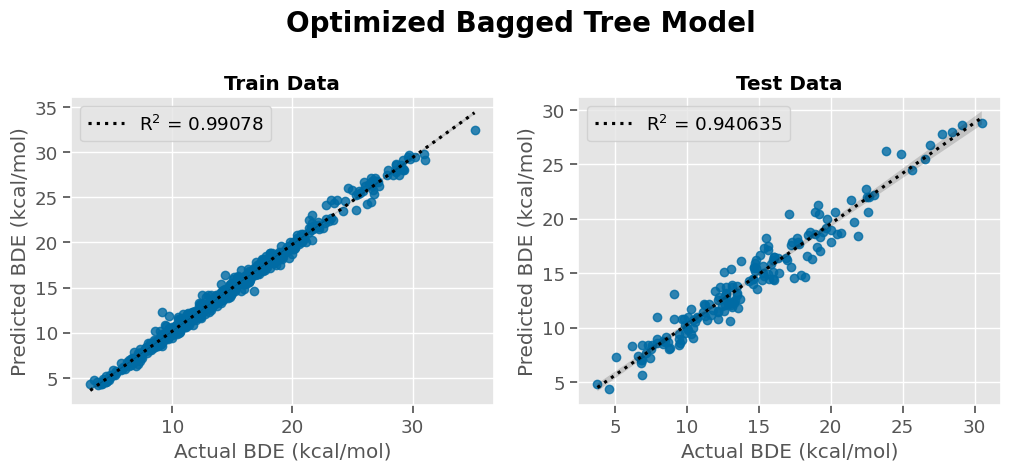

In [264]:
train_test_plot('Optimized Bagged Tree Model', bt_opt)
plt.savefig('bt_opt_refined.png')

## Evaluvation of optimized models

In [265]:
model = ['XG Boost','Random Forest', 'Bagged Tree']
pipe = [xgb_opt, rf_opt, bt_opt]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [266]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
XG Boost,0.992809,0.96233,0.486021,1.010429
Random Forest,0.990809,0.941057,0.549473,1.263934
Bagged Tree,0.99078,0.940635,0.550332,1.26845
